# A. Enfoque de validación
##ACA ESTAN LAS BASES DE DATOS Y UNA MUESTRA DE QUE ESTAN BIEN

In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
norespondieron = pd.read_excel("norespondieron.xlsx")
respondieron = pd.read_excel("respondieron.xlsx")
print(norespondieron.shape)
print(respondieron.shape)
print(norespondieron.columns.tolist())
print(respondieron.columns.tolist())

(2985, 23)
(12866, 26)
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF', 'adulto_equiv']
['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'REGION', 'ANO4', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'PP10A', 'PP03J', 'PP04A', 'P21', 'P47T', 'ITF', 'IPCF', 'adulto_equiv', 'ad_equiv_hogar', 'ingreso_necesario', 'pobre']


In [3]:
# Obtener los tipos de datos de cada df
tipos_no = norespondieron.dtypes.rename("norespondieron")
tipos_re = respondieron.dtypes.rename("respondieron")

# Unirlos en un solo DataFrame
comparacion_tipos = pd.concat([tipos_no, tipos_re], axis=1)

# Mostrar el cuadro resultante
print(comparacion_tipos)

                  norespondieron respondieron
CODUSU                    object       object
NRO_HOGAR                  int64        int64
COMPONENTE                 int64        int64
REGION                     int64        int64
ANO4                       int64        int64
CH04                       int64        int64
CH06                       int64        int64
CH07                       int64        int64
CH08                       int64        int64
CH12                       int64        int64
CH13                       int64        int64
CH14                       int64        int64
NIVEL_ED                   int64        int64
ESTADO                     int64        int64
CAT_INAC                   int64        int64
PP10A                      int64        int64
PP03J                      int64        int64
PP04A                      int64        int64
P21                        int64        int64
P47T                       int64        int64
ITF                        int64  

In [10]:
# creamos las variables a usar, la variables dependiente y variables independientes
variables_X = ['ANO4', 'CH04','CH06','CH07', 'ESTADO']
variable_y = 'pobre'

# Crear X e y
X = respondieron[variables_X].copy()
y = respondieron[variable_y]

# Agregar columna de unos para el intercepto
X.insert(0, 'const', 1)

In [12]:
# Separar en train y test (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=444
)

# A) Enfoque de validación

###ejercicio 1

In [6]:
# Calcular medias en train y test
media_train = X_train.mean()
media_test = X_test.mean()

In [7]:
# Calcular diferencia de medias
diferencias = media_train - media_test

In [8]:
# Crear tabla resumen
tabla_dif = pd.DataFrame({
    'Media_Train': media_train,
    'Media_Test': media_test,
    'Diferencia': diferencias
}).round(3)

print(tabla_dif)

        Media_Train  Media_Test  Diferencia
const         1.000       1.000       0.000
ANO4       2011.587    2011.352       0.234
CH04          1.527       1.520       0.007
CH06         35.880      36.033      -0.153
CH07          3.463       3.474      -0.011
REGION        1.000       1.000       0.000
ESTADO        2.201       2.201      -0.000


# B) Modelo de regresión logistica

### ejercicio 3: estimación y efectos marginales

In [22]:
# Estimamos el modelo de regresion logistica
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# obtenemos los coeficientes, errores estandard y los odd ratios
coefficients = result.params
standard_errors = result.bse
odd_ratios = np.exp(coefficients)

# Creamos una tabla para ver los resultados
results_table = pd.DataFrame({
    'Coeficiente': coefficients,
    'Error Estándar': standard_errors,
    'Odd Ratio': odd_ratios
})

print(results_table)

Optimization terminated successfully.
         Current function value: 0.546579
         Iterations 6
        Coeficiente  Error Estándar     Odd Ratio
const    -37.866905        5.197462  3.586016e-17
ANO4       0.018717        0.002584  1.018893e+00
CH04       0.072223        0.050046  1.074894e+00
CH06      -0.027399        0.001554  9.729725e-01
CH07      -0.103358        0.019985  9.018040e-01
ESTADO     0.162558        0.024955  1.176516e+00


In [24]:
# Calculo los efectos marginales promedio
marginal_effects = result.get_margeff(at="overall", method="dydx")

# mostramos los efectos marginales
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:                  pobre
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ANO4           0.0034      0.000      7.311      0.000       0.003       0.004
CH04           0.0132      0.009      1.444      0.149      -0.005       0.031
CH06          -0.0050      0.000    -18.530      0.000      -0.006      -0.004
CH07          -0.0189      0.004     -5.191      0.000      -0.026      -0.012
ESTADO         0.0297      0.005      6.577      0.000       0.021       0.039


### Ejercicio 4: visualización

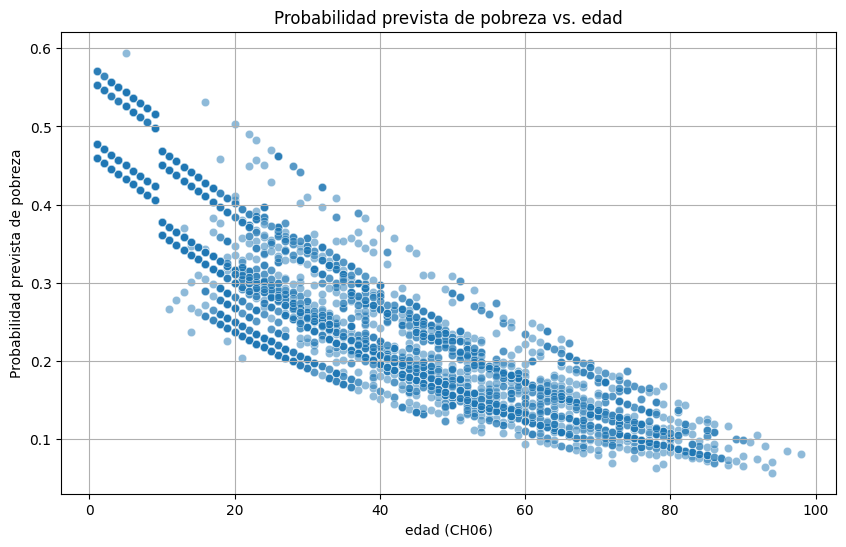

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predecimos las probabilidades
predicted_probabilities = result.predict(X_test)

# Creamos un DataFrame para graficar
plot_data = pd.DataFrame({
    'edad': X_test['CH06'],
    'Probabilidad_prevista_pobreza': predicted_probabilities
})

# Creamos el diagrama de dispersion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='edad', y='Probabilidad_prevista_pobreza', data=plot_data, alpha=0.5)
plt.title('Probabilidad prevista de pobreza vs. edad')
plt.xlabel('edad (CH06)')
plt.ylabel('Probabilidad prevista de pobreza')
plt.grid(True)
plt.show()

# C. Método de Vecinos Cercanos (KNN)

### Ejercicio 5: Estimación

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definimos los valores de k a utilizar
k_values = [1, 5, 10]

# Iteramos a través de los diferentes valores de K
for k in k_values:
    # Iniciamos el clasificador knn
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Ajustamos los datos al training
    knn_model.fit(X_train, y_train)

    # Predicción basada en los datos de entrenamiento (a modo de demostración)
    y_train_pred = knn_model.predict(X_train)

    print(f"KNN model with K={k} fitted successfully.")

    # Calculamos la precisión en los datos de entrenamiento
    #Aca se  puede agregar código para evaluar el modelo en el conjunto de prueba si es necesario.
    #Por ejemplo:
    # accuracy = accuracy_score(y_test, y_test_pred)
    # print(f"Accuracy for K={k}: {accuracy:.4f}")

KNN model with K=1 fitted successfully.
KNN model with K=5 fitted successfully.
KNN model with K=10 fitted successfully.


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

# iteramos a traves de los distintos valores de k
for k in k_values:
    print(f"\n--- Results for K = {k} ---")
    # Iniciamos el clasificador KNN
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Ajustar el modelo a los datos de entrenamiento
    knn_model.fit(X_train, y_train)

    # Predicción basada en los datos de prueba
    y_test_pred = knn_model.predict(X_test)

    # Mostramos informe de clasificación
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Mostramos matriz de confusión
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))


--- Results for K = 1 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2835
           1       0.36      0.35      0.36      1025

    accuracy                           0.66      3860
   macro avg       0.57      0.56      0.57      3860
weighted avg       0.66      0.66      0.66      3860

Confusion Matrix:
[[2199  636]
 [ 662  363]]

--- Results for K = 5 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2835
           1       0.39      0.25      0.31      1025

    accuracy                           0.70      3860
   macro avg       0.58      0.56      0.56      3860
weighted avg       0.66      0.70      0.67      3860

Confusion Matrix:
[[2434  401]
 [ 766  259]]

--- Results for K = 10 ---
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      2

### Ejercicio 6: Visualización
despues lo hago


### Ejercicio 7: K optimo por CV

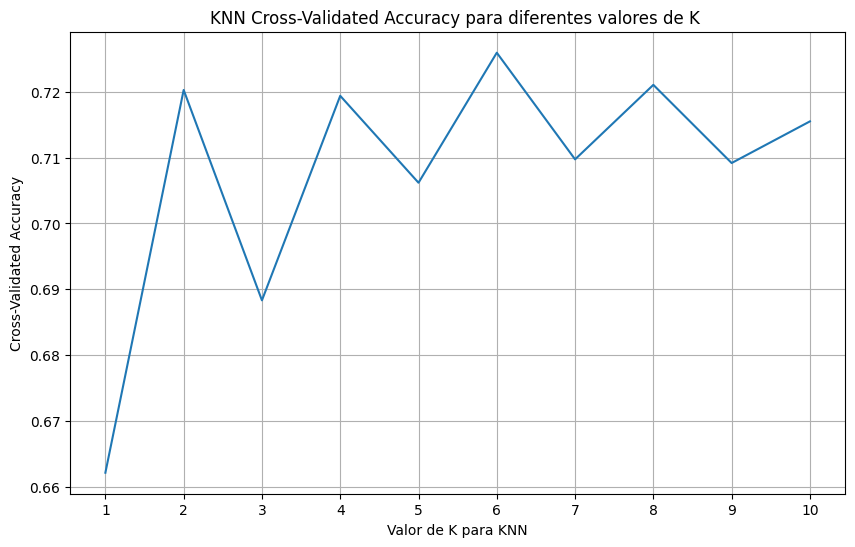

el numero optimo de vecinos (K) es: 6


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Definimos el rango de valores k a probar
k_range = range(1, 11)
k_scores = []

# Realizamos validación cruzada de 5-fold para cada K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# Graficamos la precisión para cada K
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validated Accuracy para diferentes valores de K ')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

# Find the optimal K
optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"el numero optimo de vecinos (K) es: {optimal_k}")